<a href="https://colab.research.google.com/github/fredymendezbustamante/ANALITICA_DE_DATOS/blob/main/Copia_de_EntregaFinal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Entrega Final 
# Yessica Alejandra Gomez Rivera
#Jorge  Andres Noreña
# Freddy Alexander Mendez Bustamenate 

# Analitica de Datos/Andres Marino Alvarez Mesa 




1. Red profunda: Sobre la base de datos de imágenes de políticos, entrenar y evaluar un esquema de aprendizaje profundo mediante CNNs. Justifique la arquitectura empleada, tipo de capas, activaciones, inicializaciones,normalilzaciones, etc. Interprete los resultados de la red y compare los resultados obtenidos con clasificador logístico y una SVM lineal.

In [26]:
!pip install joblib


# Importar las librerias necesarias para el modelo 

In [27]:
import os
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.base import  BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.impute import SimpleImputer 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_lfw_people


#Base de datos 


*El conjunto de datos utilizado en este ejemplo es un extracto preprocesado de "Caras etiquetadas en la naturaleza"*

*se encuentra en el siguiente enlace:*

https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html 


Dimensiones base de datos: 
 (1288, 50, 37)
Clases base de datos: 
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
[[111.666664 125.666664 120.666664 ...  85.666664  80.333336  69.333336]
 [119.333336 134.66667  134.       ...  92.666664  87.333336  72.666664]
 [120.       143.       143.       ...  99.        89.333336  77.      ]
 ...
 [ 69.666664  63.        57.       ... 200.66667  227.       234.      ]
 [ 60.333332  53.333332  47.666668 ... 233.       235.       235.      ]
 [ 56.666668  54.333332  46.333332 ... 233.66667  237.       235.      ]]


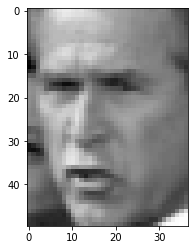

In [28]:
%matplotlib inline
#descargar base de datos
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

#ejemplo imagen en base de datos
print('Dimensiones base de datos: \n',lfw_people.images.shape)
plt.imshow(lfw_people.images[30,:,:],cmap='gray')

print('Clases base de datos: \n',lfw_people['target_names'])
print(lfw_people.images[30,:,:])





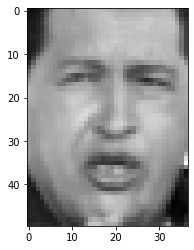

In [29]:
plt.imshow(lfw_people.images[1287,:,:],cmap='gray')
#print(lfw_people.images[1287,:,:])

Dimensiones tipo pandas:  (1288, 1850)


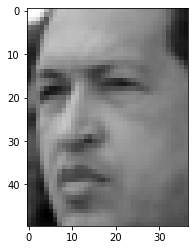

In [30]:
# datos tipo pandas
Xdata = pd.DataFrame(lfw_people.data)/255
y = lfw_people.target
print('Dimensiones tipo pandas: ',Xdata.shape)
plt.imshow(np.array(Xdata.iloc[0,:]).reshape(lfw_people.images.shape[1],lfw_people.images.shape[2]),cmap='gray')




In [31]:
print(y)

[5 6 3 ... 5 3 5]


# Partición de  entrenamiento y validación


*Realizamos una partición de los datos de 70% para realizar el entrenamiento y un 30% para la validacion de la funcionalidad del código.*

In [32]:

# Tamaño Xtrain 70%, Tamaño Xtest 30%
Xtrain, Xtest, ytrain,ytest = train_test_split(Xdata,y,test_size=0.3) 
Xtrain.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1810,1811,1812,1813,1814,1815,1816,1817,1818,1819,1820,1821,1822,1823,1824,1825,1826,1827,1828,1829,1830,1831,1832,1833,1834,1835,1836,1837,1838,1839,1840,1841,1842,1843,1844,1845,1846,1847,1848,1849
1242,0.538562,0.530719,0.560784,0.571242,0.569935,0.575163,0.589542,0.610458,0.649673,0.687582,0.709804,0.728105,0.738562,0.735948,0.741176,0.756863,0.773856,0.773856,0.775163,0.775163,0.775163,0.758170,0.749020,0.738562,0.713726,0.686275,0.664052,0.643137,0.627451,0.609150,0.576471,0.562091,0.560784,0.547712,0.533333,0.528105,0.568627,0.524183,0.522876,0.543791,...,0.835294,0.837909,0.833987,0.018301,0.009150,0.003922,0.007843,0.018301,0.124183,0.619608,0.856209,0.631373,0.352941,0.287582,0.274510,0.257516,0.298039,0.305882,0.300654,0.309804,0.330719,0.338562,0.359477,0.372549,0.363399,0.366013,0.368627,0.346405,0.308497,0.303268,0.341176,0.364706,0.386928,0.556863,0.814379,0.882353,0.849673,0.841830,0.836601,0.820915
208,0.436601,0.477124,0.448366,0.461438,0.494118,0.494118,0.507190,0.524183,0.572549,0.601307,0.611765,0.624837,0.644444,0.650980,0.652288,0.667974,0.673203,0.666667,0.669281,0.669281,0.664052,0.653595,0.637909,0.626144,0.615686,0.597386,0.566013,0.535948,0.504575,0.467974,0.453595,0.431373,0.410457,0.440523,0.403922,0.341176,0.334641,0.441830,0.469281,0.445752,...,0.278431,0.283660,0.290196,0.084967,0.143791,0.313726,0.709804,0.955556,0.985621,0.986928,0.989542,0.973856,0.909804,0.772549,0.583007,0.385621,0.385621,0.483660,0.533333,0.539869,0.521569,0.520261,0.500654,0.507190,0.515033,0.521569,0.515033,0.495425,0.424837,0.299346,0.237908,0.328105,0.508497,0.337255,0.274510,0.270588,0.265359,0.265359,0.269281,0.274510
705,0.505882,0.494118,0.487582,0.494118,0.484967,0.503268,0.535948,0.564706,0.580392,0.602614,0.639216,0.658824,0.670588,0.684967,0.711111,0.725490,0.733333,0.764706,0.776471,0.768627,0.758170,0.755556,0.749020,0.724183,0.701961,0.713726,0.737255,0.715033,0.686275,0.675817,0.662745,0.633987,0.588235,0.563399,0.594771,0.583007,0.428758,0.512418,0.486275,0.487582,...,0.257516,0.257516,0.252288,0.739869,0.747712,0.735948,0.724183,0.682353,0.641830,0.526797,0.381699,0.299346,0.253595,0.264052,0.271895,0.287582,0.309804,0.312418,0.350327,0.389542,0.400000,0.407843,0.413072,0.436601,0.458824,0.464052,0.449673,0.449673,0.454902,0.585621,0.790850,0.877124,0.886275,0.584314,0.138562,0.125490,0.190850,0.236601,0.253595,0.253595
692,0.700654,0.691503,0.695425,0.705882,0.708497,0.707190,0.718954,0.749020,0.773856,0.789542,0.807843,0.815686,0.822222,0.828758,0.831373,0.835294,0.840523,0.844444,0.853595,0.852288,0.841830,0.828758,0.819608,0.814379,0.803922,0.781699,0.754248,0.703268,0.667974,0.670588,0.758170,0.844444,0.827451,0.784314,0.717647,0.691503,0.691503,0.670588,0.677124,0.678431,...,0.137255,0.137255,0.134641,0.571242,0.609150,0.619608,0.615686,0.576471,0.392157,0.230065,0.214379,0.227451,0.210458,0.188235,0.167320,0.155556,0.175163,0.205229,0.209150,0.197386,0.218301,0.235294,0.207843,0.198693,0.240523,0.390850,0.428758,0.194771,0.047059,0.056209,0.081046,0.101961,0.108497,0.113725,0.116340,0.126797,0.137255,0.139869,0.141176,0.142484
167,0.337255,0.224837,0.186928,0.150327,0.112418,0.193464,0.426144,0.566013,0.597386,0.640523,0.687582,0.700654,0.700654,0.692810,0.660131,0.649673,0.637909,0.600000,0.559477,0.521569,0.458824,0.447059,0.430065,0.411765,0.403922,0.423529,0.435294,0.457516,0.437909,0.398693,0.367320,0.359477,0.335948,0.257516,0.189542,0.138562,0.118954,0.266667,0.209150,0.172549,...,0.458824,0.444444,0.415686,0.580392,0.407843,0.430065,0.393464,0.330719,0.326797,0.326797,0.328105,0.367320,0.594771,0.665359,0.662745,0.692810,0.658824,0.568627,0.521569,0.491503,0.427451,0.359477,0.294118,0.275817,0.287582,0.338562,0.400000,0.418301,0.389542,0.393464,0.406536,0.418301,0.433987,0.435294,0.423529,0.418301,0.449673,0.458824,0.431373,0.443137


In [33]:
import tensorflow as tf
import tensorflow_probability as tfp 
import matplotlib.pyplot as plt 
import numpy as np

# Arquitectura CNN


# Redes Neuronales Convolucionales - CNN

Las arquitecturas típicas de CNN apilan algunas capas convolucionales
(seguida de una capa SeLU), luego una capa de pooling, luego otras pocas
capas convolucionales (+ SeLU), luego otra capa de pooling, y así
sucesivamente.

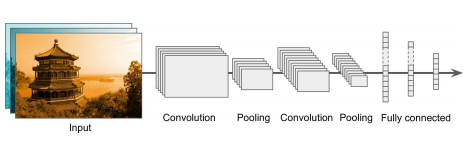

La imagen se hace cada vez más pequeña a medida que avanza por la red,
pero también se vuelve cada vez más profunda (es decir, con más mapas
de características) gracias a las capas convolucionales.


In [34]:
X_train_full=np.array(Xtrain).reshape(Xtrain.shape[0],lfw_people.images.shape[1],lfw_people.images.shape[2])
y_train_full=ytrain
X_test=np.array(Xtest).reshape(Xtest.shape[0],lfw_people.images.shape[1],lfw_people.images.shape[2])
y_test=ytest
print(X_train_full.shape,X_test.shape)
print(y_train_full.shape,y_test.shape)
X_train, X_valid = X_train_full[:-50], X_train_full[-50:]
y_train, y_valid = y_train_full[:-50], y_train_full[-50:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
print(X_valid.shape)

(901, 50, 37) (387, 50, 37)
(901,) (387,)
(851, 50, 37, 1) (387, 50, 37, 1)
(851,) (387,)
(50, 50, 37, 1)


# Definición del modelo 

*Definimos el modelo, con cada una de sus caracteristicas, para que sea el más indicado, también definimos las densas y el regularizador que permitira que las neuronas se apaguen aleatoriamente.
Esto con el fin de obtener el mejor rendimiento de la red neuronal.* 

In [35]:
from functools import partial
from tensorflow import keras
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=2, activation='selu', kernel_initializer="he_normal", padding="SAME")

model = keras.models.Sequential([
    
    #extraer caracteristicas
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[50, 37 ,1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Dropout(0.25),
    keras.layers.BatchNormalization(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    

    #clasificador por MLP  -> densas
    keras.layers.Flatten(),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=128, activation ="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.5), # regularizar, apagar aleatoriamente neuronas
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=64, activation="selu",kernel_initializer="lecun_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=7, activation='softmax'),
])

#Modelo Obtenido:
*A continuacion vamos a mostrar la arquitectura de nuestro modelo hasta ahora, el modelo con cada una de las capas convolucionales, las  salidas de cada capa y los paramétros utilizados.* 


In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 50, 37, 64)        3200      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 18, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25, 18, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 25, 18, 128)       32896     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 25, 18, 128)       65664     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 9, 128)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 9, 128)       

* Arriba, puede ver que la salida de cada capa Conv2D y MaxPooling2D es un tensor de forma 3D (alto, ancho, canales). Las dimensiones de ancho y alto tienden a encogerse a medida que profundiza en la red. El número de canales de salida para cada capa Conv2D se controla mediante el primer argumento (por ejemplo, 32 o 64). Normalmente, a medida que el ancho y la altura se reducen, puede permitirse (computacionalmente) agregar más canales de salida en cada capa Conv2D.

#Descenso estocástico del gradiente – SGD (Stochastic Gradient Descent)

El descenso estocástico o gradiente de descenso incremental, es una aproximación estocástica del gradiente descendiente usado para minimizar una función objetivo que se escribe como una suma de funciones diferenciables. Este optimizador trata de encontrar mínimos o máximos por iteración.
Al igual que en la función del gradiente descendente, el gradiente indica la dirección en la que la función tiene el ratio de aumento más pronunciada aunque no indica hasta donde se debe avanzar en esa dirección.
Como este optimizador no nos fija cuanto avanzar, existe el ratio de aprendizaje que no determina la distancia que recorrerá en cada iteración en la dirección que del gradiente.

#Compilamos y entrenamos el modelo

* Entrenamos la red utilizanod un optimizador SGD, porque se genera un mejor modelo y no se sobreajusta  la red convolucional. Tambien utilizamos un epoch de 50 que indica la cantidad de veces que los datos recorreran el modelo, y procedemos a entrenarlo.
como se ve a continuacion:


In [37]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [38]:
#optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
#optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False,name="Adam")
#optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,centered=False,name="RMSprop")
#optimizer =tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad")
#optimizer =tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Adamax")
#optimizer =tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
#optimizer=tf.keras.optimizers.Ftrl(learning_rate=0.001,learning_rate_power=-0.5,initial_accumulator_value=0.1,l1_regularization_strength=0.0,l2_regularization_strength=0.0,name="Ftrl",l2_shrinkage_regularization_strength=0.0,beta=0.0)
# Este ultimo no utilizarlo
#model.compile(optimizer=optimizer,loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
 
#model.compile(loss="sparse_categorical_crossentropy", optimizer="Adagrad", metrics=["accuracy"]) Este da algo mejor epochs=25
#optimizer =tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam")
 
#model.compile(loss="sparse_categorical_crossentropy", optimizer="Adagrad", metrics=["accuracy"])
 
model.compile(loss="sparse_categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])
 
#model.compile(optimizer="Nadam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
 
 
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
27/27 [==============================] - 1s 20ms/step - loss: 2.1300 - accuracy: 0.2726 - val_loss: 1.5665 - val_accuracy: 0.5000
Epoch 2/100
27/27 [==============================] - 0s 11ms/step - loss: 1.6331 - accuracy: 0.4501 - val_loss: 1.1876 - val_accuracy: 0.5800
Epoch 3/100
27/27 [==============================] - 0s 11ms/step - loss: 1.4346 - accuracy: 0.5135 - val_loss: 1.1901 - val_accuracy: 0.6600
Epoch 4/100
27/27 [==============================] - 0s 11ms/step - loss: 1.2878 - accuracy: 0.5629 - val_loss: 1.0127 - val_accuracy: 0.7400
Epoch 5/100
27/27 [==============================] - 0s 11ms/step - loss: 1.2089 - accuracy: 0.5969 - val_loss: 0.8800 - val_accuracy: 0.7400
Epoch 6/100
27/27 [==============================] - 0s 10ms/step - loss: 1.0701 - accuracy: 0.6357 - val_loss: 0.8897 - val_accuracy: 0.7600
Epoch 7/100
27/27 [==============================] - 0s 10ms/step - loss: 0.9415 - accuracy: 0.6910 - val_loss: 0.8934 - val_accuracy: 0.7600
Epoch 

# Evaluar el modelo

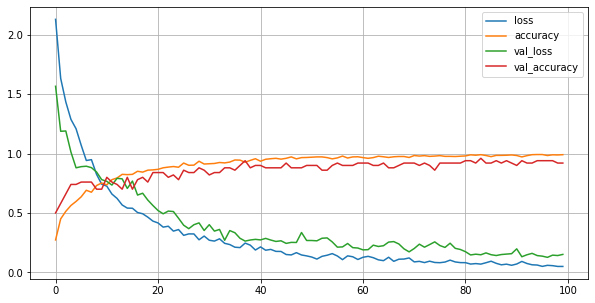

In [39]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.show()

*Esta es la grafica correspondiente al entrenamiento del modelo, podemos observar que el modelo converge, no se sobreajusta.*

In [40]:
score = model.evaluate(X_test, y_test)
print(score)
X_new = X_test[:2] # pretend we have new images
y_pred = model.predict_classes(X_new)
print(y_pred,y_test[:2])

13/13 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8966
[0.35481226444244385, 0.8966408371925354]
[3 2] [3 2]


Podmeos observar que al aplicar el aprendizaje profundo CNN ha logrado una precision de prueba de mas del 90%.

# Matrix confusion 

In [41]:

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix_CNN(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = 100*cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.1f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


#Conjunto de test 

(387, 7)
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        30
           1       0.97      0.92      0.95        77
           2       0.86      0.82      0.84        38
           3       0.95      0.97      0.96       154
           4       0.60      0.96      0.74        26
           5       0.82      0.74      0.78        19
           6       0.94      0.74      0.83        43

    accuracy                           0.90       387
   macro avg       0.86      0.85      0.85       387
weighted avg       0.91      0.90      0.90       387
 ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


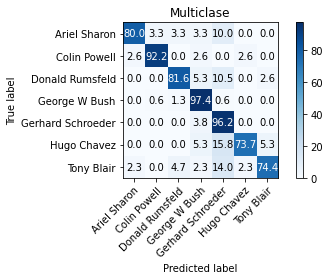

In [42]:

y_test_e= model.predict(X_test)
print(y_test_e.shape)
plot_confusion_matrix(y_test, y_test_e.argmax(axis=1),classes=lfw_people.target_names,normalize=True,)
plt.title('Multiclase')
print(classification_report(y_test, y_test_e.argmax(axis=1)),lfw_people.target_names)

*Podemos observar de una manera mas visual el resultado del rendimiento de nuestro modelo clasificador,una vez entrenado Los resultados obtenidos en la matrix de confusion de la arquitectura CNN,nos demuestran que los parametros escogidos para el modelo fueron los más adecuados, estos parametros y este rendiemiento se tuvo a prueba y error.* 

# Se ajusta el modelo 

ahora para mejorar el modelo, se busca ajustarlo añadiendo mas capas buscando por nombre para tener mas informacion 

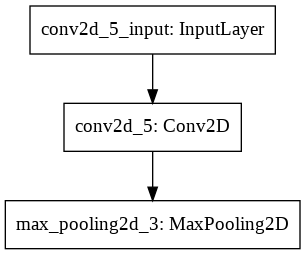

In [43]:
import tensorflow as tf
model_B = tf.keras.Model(inputs=model.inputs,outputs=model.layers[1].output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) 

In [44]:
z = model_B.predict(X_test)
z.shape

(387, 25, 18, 64)

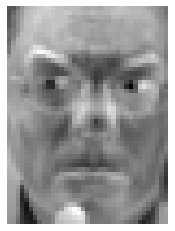

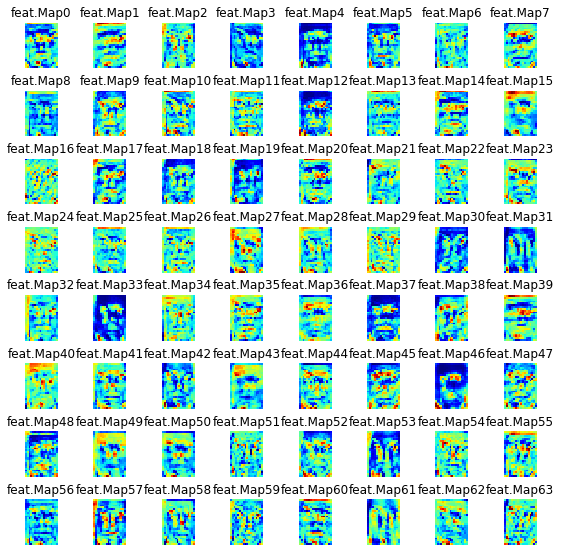

In [45]:
i = 20
plt.imshow(X_test[i,:,:,0], cmap="binary", interpolation="nearest")
plt.axis('off')
plt.show()
n_rows = 8
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(z[i,:,:,index], cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("feat.Map" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [46]:
print(model.layers[0].get_weights()[0].shape)
print(model.layers[0].get_weights()[1].shape)

(7, 7, 1, 64)
(64,)


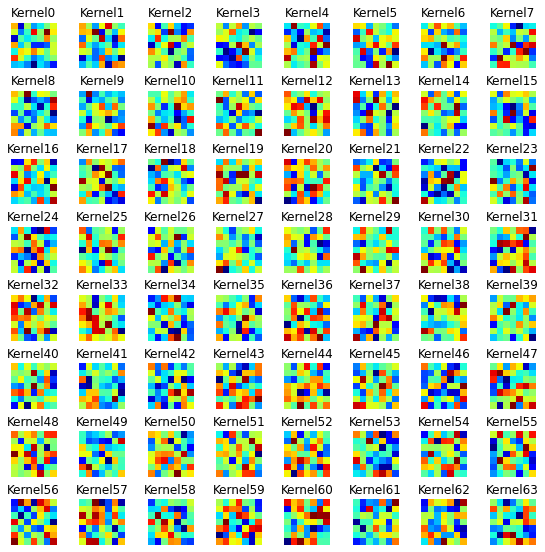

In [47]:
nucleos = model.layers[0].get_weights()[0]
n_rows = 8
n_cols = 8
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(nucleos[:,:,0,index], cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("Kernel" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

#Escoger modelo por gridsearchCV utilizando pipeline

In [48]:
 
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
import sklearn
#from sklearn.externals import joblib #https://joblib.readthedocs.io/en/latest/
import joblib

steps=[[('rep',  PCA()),
        ('cla', LogisticRegression())],
       [('rep',  PCA()),
        ('cla', SVC())]
    #   [('rep',  PCA()),
    #    ('cla', SGDClassifier())],
    #    [('cla', Keras_CKA())]

      ]
parameters = [{
              'rep__n_components' : [0.8,0.9],              
              'cla__C': [0.5,1],
              },
             {
             #'rep__n_components' : [0.8,0.9],              
             #'cla__C': [0.1,1,100,500,1e3],
             #'cla__gamma': [0.01, 0.1, 1,10, 100,1e3]     
             },
              {
              'rep__n_components' : [0.8,0.9],              
              'cla__alpha': [0.0001,0.001],
              },

             ]

label_models = ['PCA_Logistic','PCA_SGD', 'SVCrbf']

best_model = []
filename = ''#'resultados/people_comp'
for i in range(len(steps)):
    print('modelo %d/%d' % (i+1,len(steps)))
    grid_search = GridSearchCV(Pipeline(steps[i]), parameters[i], n_jobs=-1,cv=5,
                                scoring='balanced_accuracy',verbose=10)
    grid_search.fit(Xtrain, ytrain)
    #print(grid_search.cv_results_)
    #mejor modelo entrenado
    best_model += [grid_search.best_estimator_]
    joblib.dump(best_model,filename+".pkl")

print('Mejores modelos:\n')
best_model

modelo 1/2
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.6s finished


modelo 2/2
Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    3.1s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.3s finished


Mejores modelos:



[Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=0.9,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),
                 ('cla',
                  LogisticRegression(C=1, class_weight=None, dual=False,
                                     fit_intercept=True, intercept_scaling=1,
                                     l1_ratio=None, max_iter=100,
                                     multi_class='auto', n_jobs=None,
                                     penalty='l2', random_state=None,
                                     solver='lbfgs', tol=0.0001, verbose=0,
                                     warm_start=False))],
          verbose=False), Pipeline(memory=None,
          steps=[('rep',
                  PCA(copy=True, iterated_power='auto', n_components=None,
                      random_state=None, svd_solver='auto', tol=0.0,
                      whiten=False)),


#Evaluar sobre Xtest

Evaluando modelo 1/2


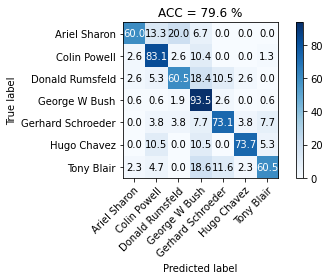

                   precision    recall  f1-score   support

     Ariel Sharon       0.78      0.60      0.68        30
     Colin Powell       0.84      0.83      0.84        77
  Donald Rumsfeld       0.66      0.61      0.63        38
    George W Bush       0.83      0.94      0.88       154
Gerhard Schroeder       0.59      0.73      0.66        26
      Hugo Chavez       0.82      0.74      0.78        19
       Tony Blair       0.84      0.60      0.70        43

         accuracy                           0.80       387
        macro avg       0.77      0.72      0.74       387
     weighted avg       0.80      0.80      0.79       387

Evaluando modelo 2/2


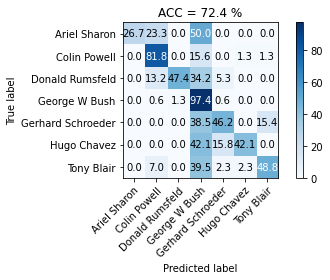

                   precision    recall  f1-score   support

     Ariel Sharon       1.00      0.27      0.42        30
     Colin Powell       0.80      0.82      0.81        77
  Donald Rumsfeld       0.90      0.47      0.62        38
    George W Bush       0.67      0.97      0.79       154
Gerhard Schroeder       0.63      0.46      0.53        26
      Hugo Chavez       0.80      0.42      0.55        19
       Tony Blair       0.81      0.49      0.61        43

         accuracy                           0.72       387
        macro avg       0.80      0.56      0.62       387
     weighted avg       0.76      0.72      0.70       387



In [49]:

my_model_loaded = joblib.load(filename+".pkl")
path_img = ''
for i in range(len(my_model_loaded)):
    print('Evaluando modelo %d/%d' % (i+1,len(my_model_loaded)))

    ytest_e = my_model_loaded[i].predict(Xtest)
    acc = accuracy_score(ytest,ytest_e)
     
    plot_confusion_matrix(
                          ytest, ytest_e, 
                          classes=lfw_people.target_names,
                          normalize=True,
                          title='ACC = %.1f %%' % (100*acc)
                          )
    plt.autoscale()
    #save_fig(path_img,label_models[i])                      
    plt.show()
    
    cr = classification_report(
                               ytest, ytest_e, 
                               labels=range(lfw_people.target_names.shape[0]),
                               target_names=lfw_people.target_names
                               )                          
    #support = #muestras en la clase estudiada
    print(cr)



Gracias al analisis que se le realizo con las matrices de confusion, podemos ver la probabilidada del modelo que predice los rostros de los presidentes, para una precision (ACC) del 81,1% podemos ver que George W Bush fue el presidente que mejor predijo con un 92,7% de exactitud,  mientras que para Donald Rumsfeld fue al que peor predijo con un 56,7% de exactitud, esto se puede explicar dadas las calidades de imagenes que tienen la base de datos y tambien la cantidad de la misma que se estan aplicando en el preentreno.
se puede ver que al reducir la exactitud del modelo cambia la precision con la que puede predice los rostros de los presidentes, se puede ver que teniendo una precision (ACC) del 73,1%, predijo a George W Bush con un 97,6% de exactitud, y ahora ya no es  Donald Rumsfeld el de peor prediccion si no que ahora es Gerhard Schroeder el cual tienen un 28,9% de exactitud, llegando a confundirlo con George W Bush en un 42,1% de las veces.

Evaluando ROC modelo 1/2


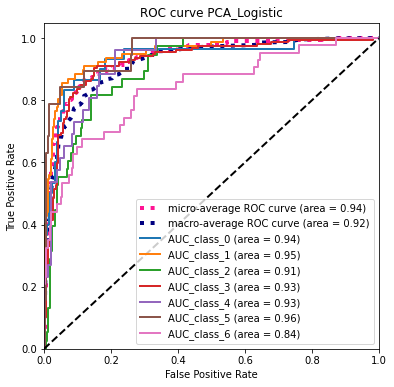

Evaluando ROC modelo 2/2


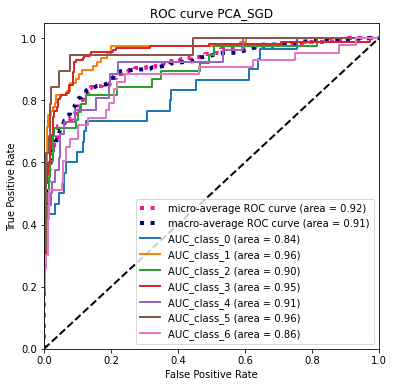

In [50]:
from sklearn.preprocessing import label_binarize
import seaborn as sns

def roc_multiclass(ytrue,yscore):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = ytrue.shape[1]
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(ytrue[:, i], yscore[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(ytrue.ravel(), yscore.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    return roc_auc, fpr, tpr, n_classes
    #fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def roc_auc_mc(roc_auc,fpr,tpr,n_classes,title,path_img):   
    lw = 2
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(6,6))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    #colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    colors = sns.color_palette(None, n_classes)
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='AUC_class_{0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="best")#,bbox_to_anchor=(1.4, 0.75))

    #save_fig(path_img,title)
    plt.show()



ytrain_b = label_binarize(ytrain, classes=range(lfw_people.target_names.shape[0]))
ytest_b = label_binarize(ytest, classes=range(lfw_people.target_names.shape[0]))

for i in range(len(my_model_loaded)):
    print('Evaluando ROC modelo %d/%d' % (i+1,len(my_model_loaded)))
    ytest_score = my_model_loaded[i].decision_function(Xtest) #debe calcularse la funcion de decision o el posterior de la probabilidad
    roc_auc, fpr, tpr, n_classes = roc_multiclass(ytest_b,ytest_score)
    roc_auc_mc(roc_auc,fpr,tpr,n_classes,'ROC curve ' + label_models[i],path_img)


# Conclusión: 
Una base de datos ya estabelecida se utilizo para la clasificacion de Rostros de personas, la cual se uso para el entrenamiento mediante CNN, se obtuvo un resultado prometedor pues apartir de este resultaso el modelo obtenido lo podemos clasificar como optimo, observamos que al aplicar el aprendizaje profundo CNN ha logrado una precision de prueba de mas del 90%.

Tambien se han aplicado soluciones para evitar el sobreajuste como el dropout y , al igual que varios metodos que facilitan la otimizacion de los coeficientes para llegara a la convergencia de la funcion de coste como la prueba de diferentes funciones optimizadoras.




